In [1]:
import numpy  as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from matplotlib import pyplot
import seaborn as sns
%matplotlib inline
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from matplotlib.pylab import rcParams
import itertools

In [2]:
data =pd.read_csv('Berlin_683.csv')
data.tail(100)


,id,stid,e5,e10,diesel,date,changed
13361,138140846,49d45108-e566-470e-aa7e-fd3c6590c683,1629,0,1379,10/7/2018 7:35,1
13362,138148234,49d45108-e566-470e-aa7e-fd3c6590c683,1609,0,1379,10/7/2018 8:20,4
13363,138149020,49d45108-e566-470e-aa7e-fd3c6590c683,1579,0,1379,10/7/2018 8:23,4
13364,138160659,49d45108-e566-470e-aa7e-fd3c6590c683,1579,0,1359,10/7/2018 9:12,1
13365,138161220,49d45108-e566-470e-aa7e-fd3c6590c683,1559,0,1359,10/7/2018 9:16,4
13366,138163615,49d45108-e566-470e-aa7e-fd3c6590c683,1559,0,1339,10/7/2018 9:28,1
13367,138174786,49d45108-e566-470e-aa7e-fd3c6590c683,1549,0,1339,10/7/2018 10:30,4
13368,138175570,49d45108-e566-470e-aa7e-fd3c6590c683,1539,0,1339,10/7/2018 10:34,4
13369,138175720,49d45108-e566-470e-aa7e-fd3c6590c683,1519,0,1339,10/7/2018 10:35,4
13370,138179202,49d45108-e566-470e-aa7e-fd3c6590c683,1489,0,1339,10/7/2018 10:57,4


In [3]:
print(data.dtypes)


id          int64
stid       object
e5          int64
e10         int64
diesel      int64
date       object
changed     int64
dtype: object


In [4]:
data.reset_index(drop=True)

,id,stid,e5,e10,diesel,date,changed
0,13996,49d45108-e566-470e-aa7e-fd3c6590c683,1289,1269,1069,5/1/2016 21:26,63
1,18368,49d45108-e566-470e-aa7e-fd3c6590c683,1499,1479,1269,5/1/2016 22:05,21
2,33063,49d45108-e566-470e-aa7e-fd3c6590c683,1349,1329,1099,5/2/2016 6:09,21
3,44681,49d45108-e566-470e-aa7e-fd3c6590c683,1349,1329,1089,5/2/2016 7:29,1
4,48669,49d45108-e566-470e-aa7e-fd3c6590c683,1329,1309,1089,5/2/2016 8:05,20
5,57408,49d45108-e566-470e-aa7e-fd3c6590c683,1329,1309,1079,5/2/2016 9:25,1
6,67493,49d45108-e566-470e-aa7e-fd3c6590c683,1289,1269,1069,5/2/2016 11:05,21
7,73671,49d45108-e566-470e-aa7e-fd3c6590c683,1329,1309,1109,5/2/2016 12:01,21
8,86501,49d45108-e566-470e-aa7e-fd3c6590c683,1319,1299,1099,5/2/2016 12:45,21
9,97677,49d45108-e566-470e-aa7e-fd3c6590c683,1299,1279,1079,5/2/2016 14:05,21


In [5]:
print(data.columns)

Index(['id', 'stid', 'e5', 'e10', 'diesel', 'date', 'changed'], dtype='object')


In [6]:
from datetime import datetime
con=data['date']
data['date']=pd.to_datetime(data['date'])
data.set_index('date',inplace=True)
data.index

DatetimeIndex(['2016-05-01 21:26:00', '2016-05-01 22:05:00',
               '2016-05-02 06:09:00', '2016-05-02 07:29:00',
               '2016-05-02 08:05:00', '2016-05-02 09:25:00',
               '2016-05-02 11:05:00', '2016-05-02 12:01:00',
               '2016-05-02 12:45:00', '2016-05-02 14:05:00',
               ...
               '2018-10-10 17:28:00', '2018-10-10 17:46:00',
               '2018-10-10 18:28:00', '2018-10-10 19:04:00',
               '2018-10-10 19:11:00', '2018-10-10 19:36:00',
               '2018-10-10 20:26:00', '2018-10-10 21:13:00',
               '2018-10-10 22:00:00', '2018-10-10 22:05:00'],
              dtype='datetime64[ns]', name='date', length=13461, freq=None)

In [7]:
print(data.columns)

Index(['id', 'stid', 'e5', 'e10', 'diesel', 'changed'], dtype='object')


In [8]:
data.head(100)

,id,stid,e5,e10,diesel,changed
date,,,,,,
2016-05-01 21:26:00,13996,49d45108-e566-470e-aa7e-fd3c6590c683,1289,1269,1069,63
2016-05-01 22:05:00,18368,49d45108-e566-470e-aa7e-fd3c6590c683,1499,1479,1269,21
2016-05-02 06:09:00,33063,49d45108-e566-470e-aa7e-fd3c6590c683,1349,1329,1099,21
2016-05-02 07:29:00,44681,49d45108-e566-470e-aa7e-fd3c6590c683,1349,1329,1089,1
2016-05-02 08:05:00,48669,49d45108-e566-470e-aa7e-fd3c6590c683,1329,1309,1089,20
2016-05-02 09:25:00,57408,49d45108-e566-470e-aa7e-fd3c6590c683,1329,1309,1079,1
2016-05-02 11:05:00,67493,49d45108-e566-470e-aa7e-fd3c6590c683,1289,1269,1069,21
2016-05-02 12:01:00,73671,49d45108-e566-470e-aa7e-fd3c6590c683,1329,1309,1109,21
2016-05-02 12:45:00,86501,49d45108-e566-470e-aa7e-fd3c6590c683,1319,1299,1099,21


In [9]:
data.tail(50)

,id,stid,e5,e10,diesel,changed
date,,,,,,
2018-10-09 07:31:00,138500874,49d45108-e566-470e-aa7e-fd3c6590c683,1619,0,1379,1
2018-10-09 08:11:00,138509229,49d45108-e566-470e-aa7e-fd3c6590c683,1599,0,1379,4
2018-10-09 08:35:00,138515488,49d45108-e566-470e-aa7e-fd3c6590c683,1559,0,1379,4
2018-10-09 10:00:00,138533850,49d45108-e566-470e-aa7e-fd3c6590c683,1559,0,1369,1
2018-10-09 10:01:00,138534196,49d45108-e566-470e-aa7e-fd3c6590c683,1539,0,1369,4
2018-10-09 10:04:00,138534620,49d45108-e566-470e-aa7e-fd3c6590c683,1539,0,1339,1
2018-10-09 10:37:00,138540978,49d45108-e566-470e-aa7e-fd3c6590c683,1529,0,1339,4
2018-10-09 11:26:00,138549480,49d45108-e566-470e-aa7e-fd3c6590c683,1489,0,1339,4
2018-10-09 12:00:00,138556561,49d45108-e566-470e-aa7e-fd3c6590c683,1539,0,1389,5


In [10]:
del data['id']

In [11]:

del data['stid']


In [12]:
del data['e5']


In [13]:
del data['e10']

In [14]:
del data['changed']


In [15]:
data.head()

,diesel
date,
2016-05-01 21:26:00,1069
2016-05-01 22:05:00,1269
2016-05-02 06:09:00,1099
2016-05-02 07:29:00,1089
2016-05-02 08:05:00,1089


In [16]:
print(data.dtypes)

diesel    int64
dtype: object


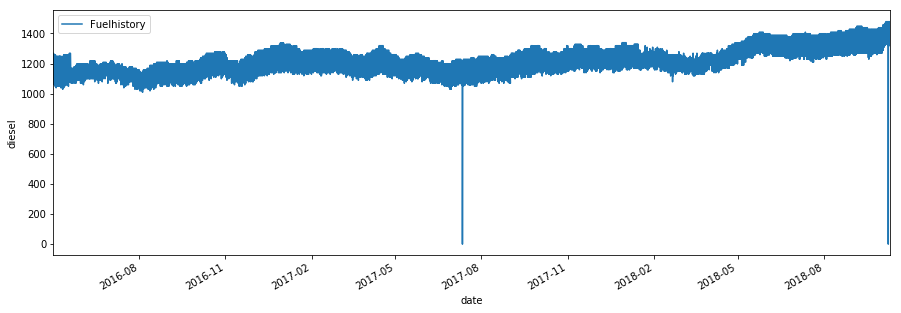

In [17]:
my_plot=data.plot(kind='line',figsize=(15,5))
my_plot.set_xlabel("date")
my_plot.set_ylabel("diesel")
my_plot.legend(["Fuelhistory"])

In [18]:
data.isnull()

,diesel
date,
2016-05-01 21:26:00,False
2016-05-01 22:05:00,False
2016-05-02 06:09:00,False
2016-05-02 07:29:00,False
2016-05-02 08:05:00,False
2016-05-02 09:25:00,False
2016-05-02 11:05:00,False
2016-05-02 12:01:00,False
2016-05-02 12:45:00,False


In [19]:
data.describe()

,diesel
count,13461.000000
mean,1200.273457
std,78.553685
min,0.000000
25%,1139.000000
50%,1199.000000
75%,1259.000000
max,1479.000000


In [20]:
data = data[~np.all(data == 0, axis=1)]

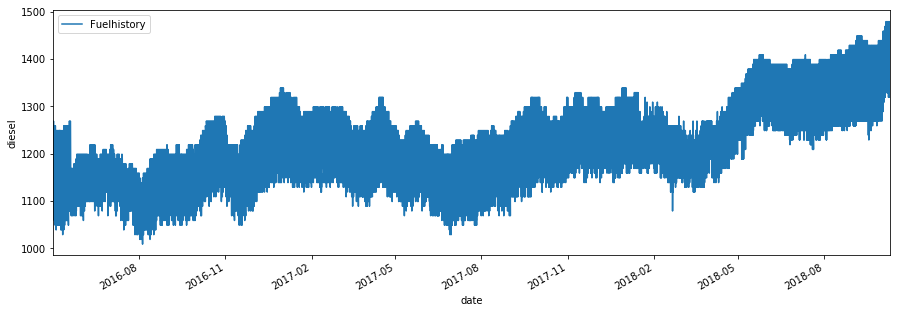

In [21]:
my_plot=data.plot(kind='line',figsize=(15,5))
my_plot.set_xlabel("date")
my_plot.set_ylabel("diesel")
my_plot.legend(["Fuelhistory"])

In [22]:
data.isnull()

,diesel
date,
2016-05-01 21:26:00,False
2016-05-01 22:05:00,False
2016-05-02 06:09:00,False
2016-05-02 07:29:00,False
2016-05-02 08:05:00,False
2016-05-02 09:25:00,False
2016-05-02 11:05:00,False
2016-05-02 12:01:00,False
2016-05-02 12:45:00,False


In [23]:
data=data['2016-5-2':'2018-10-9']
print(data.dtypes)

diesel    int64
dtype: object


In [24]:
print(data.index[0],data.index[-1])

2016-05-02 06:09:00 2018-10-09 22:00:00


In [25]:
mid=pd.date_range(data.index[0],data.index[-1],freq="H",normalize=True)
mid

DatetimeIndex(['2016-05-02 00:00:00', '2016-05-02 01:00:00',
               '2016-05-02 02:00:00', '2016-05-02 03:00:00',
               '2016-05-02 04:00:00', '2016-05-02 05:00:00',
               '2016-05-02 06:00:00', '2016-05-02 07:00:00',
               '2016-05-02 08:00:00', '2016-05-02 09:00:00',
               ...
               '2018-10-08 15:00:00', '2018-10-08 16:00:00',
               '2018-10-08 17:00:00', '2018-10-08 18:00:00',
               '2018-10-08 19:00:00', '2018-10-08 20:00:00',
               '2018-10-08 21:00:00', '2018-10-08 22:00:00',
               '2018-10-08 23:00:00', '2018-10-09 00:00:00'],
              dtype='datetime64[ns]', length=21361, freq='H')

In [26]:
new_index=mid.union(data.index)
#print(new_index)

upsampled_data=data.reindex(new_index)
upsampled_data.head(20)


,diesel
2016-05-02 00:00:00,NaN
2016-05-02 01:00:00,NaN
2016-05-02 02:00:00,NaN
2016-05-02 03:00:00,NaN
2016-05-02 04:00:00,NaN
2016-05-02 05:00:00,NaN
2016-05-02 06:00:00,NaN
2016-05-02 06:09:00,1099.0
2016-05-02 07:00:00,NaN
2016-05-02 07:29:00,1089.0


In [27]:
upsampled_data.isnull()



,diesel
2016-05-02 00:00:00,True
2016-05-02 01:00:00,True
2016-05-02 02:00:00,True
2016-05-02 03:00:00,True
2016-05-02 04:00:00,True
2016-05-02 05:00:00,True
2016-05-02 06:00:00,True
2016-05-02 06:09:00,False
2016-05-02 07:00:00,True
2016-05-02 07:29:00,False


In [28]:
upsampled_data = upsampled_data.iloc[7:]
upsampled_data.head(100)


,diesel
2016-05-02 06:09:00,1099.0
2016-05-02 07:00:00,NaN
2016-05-02 07:29:00,1089.0
2016-05-02 08:00:00,NaN
2016-05-02 08:05:00,1089.0
2016-05-02 09:00:00,NaN
2016-05-02 09:25:00,1079.0
2016-05-02 10:00:00,NaN
2016-05-02 11:00:00,NaN
2016-05-02 11:05:00,1069.0


In [29]:

upsampled_data = upsampled_data.fillna(method='ffill')

upsampled_data.head(100)

,diesel
2016-05-02 06:09:00,1099.0
2016-05-02 07:00:00,1099.0
2016-05-02 07:29:00,1089.0
2016-05-02 08:00:00,1089.0
2016-05-02 08:05:00,1089.0
2016-05-02 09:00:00,1089.0
2016-05-02 09:25:00,1079.0
2016-05-02 10:00:00,1079.0
2016-05-02 11:00:00,1079.0
2016-05-02 11:05:00,1069.0


In [30]:
#upsampled_data=data.reindex(new_index)
df=upsampled_data.astype(int)
df.head(20)

,diesel
2016-05-02 06:09:00,1099
2016-05-02 07:00:00,1099
2016-05-02 07:29:00,1089
2016-05-02 08:00:00,1089
2016-05-02 08:05:00,1089
2016-05-02 09:00:00,1089
2016-05-02 09:25:00,1079
2016-05-02 10:00:00,1079
2016-05-02 11:00:00,1079
2016-05-02 11:05:00,1069


In [31]:
df.describe()

,diesel
count,33572.000000
mean,1201.055880
std,77.835027
min,1009.000000
25%,1139.000000
50%,1199.000000
75%,1259.000000
max,1479.000000


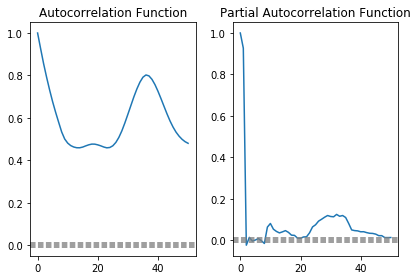

In [32]:
def Plot_ACF_PACF(value):
    lag_acf = acf(value, nlags=50)
    lag_pacf = pacf(value, nlags=50, method='ols')
    plt.subplot(121) 
    plt.plot(lag_acf)
    plt.axhline(y=0,linestyle='--',color='gray')
    plt.axhline(y=-1.96/np.sqrt(len(value)),linestyle='--',color='gray')
    plt.axhline(y=1.96/np.sqrt(len(value,)),linestyle='--',color='gray')
    plt.title('Autocorrelation Function')
    plt.subplot(122)
    plt.plot(lag_pacf)
    plt.axhline(y=0,linestyle='--',color='gray')
    plt.axhline(y=-1.96/np.sqrt(len(value)),linestyle='--',color='gray')
    plt.axhline(y=1.96/np.sqrt(len(value)),linestyle='--',color='gray')
    plt.title('Partial Autocorrelation Function')
    plt.tight_layout()
Plot_ACF_PACF(df.diesel)

In [33]:

Monthly_data=df['2017-9-2':'2017-9-9']
Monthly_data.head(100)

,diesel
2017-09-02 00:00:00,1269
2017-09-02 01:00:00,1269
2017-09-02 02:00:00,1269
2017-09-02 03:00:00,1269
2017-09-02 04:00:00,1269
2017-09-02 05:00:00,1269
2017-09-02 05:19:00,1269
2017-09-02 06:00:00,1269
2017-09-02 06:34:00,1179
2017-09-02 07:00:00,1179


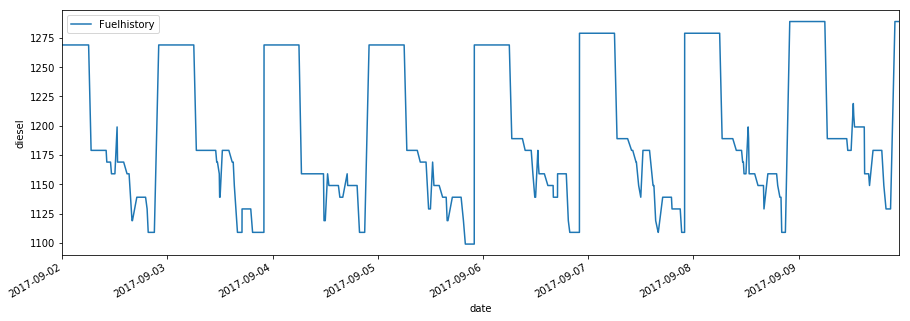

In [34]:
my_plot=Monthly_data.plot(kind='line',figsize=(15,5))
my_plot.set_xlabel("date")
my_plot.set_ylabel("diesel")
my_plot.legend(["Fuelhistory"])


In [35]:
df.index.name='date'
df.reset_index(inplace=True)
df.head()


,date,diesel
0,2016-05-02 06:09:00,1099
1,2016-05-02 07:00:00,1099
2,2016-05-02 07:29:00,1089
3,2016-05-02 08:00:00,1089
4,2016-05-02 08:05:00,1089


In [36]:
df['date']=pd.to_datetime(df['date'])
df.set_index('date',inplace=True)
df.index

DatetimeIndex(['2016-05-02 06:09:00', '2016-05-02 07:00:00',
               '2016-05-02 07:29:00', '2016-05-02 08:00:00',
               '2016-05-02 08:05:00', '2016-05-02 09:00:00',
               '2016-05-02 09:25:00', '2016-05-02 10:00:00',
               '2016-05-02 11:00:00', '2016-05-02 11:05:00',
               ...
               '2018-10-09 14:58:00', '2018-10-09 15:16:00',
               '2018-10-09 15:51:00', '2018-10-09 16:11:00',
               '2018-10-09 17:01:00', '2018-10-09 17:20:00',
               '2018-10-09 17:46:00', '2018-10-09 19:09:00',
               '2018-10-09 21:16:00', '2018-10-09 22:00:00'],
              dtype='datetime64[ns]', name='date', length=33572, freq=None)

In [37]:

#tf=df['diesel']
#tf.tail()

In [38]:
#split = int(len(tf) / 2)
#print(split)
#X1=X[0:split]
#X2 =X[split:]
#mean1, mean2 = X1.mean(), X2.mean()
#var1, var2 = X1.var(), X2.var()
#print('mean1=%f, mean2=%f' % (mean1, mean2))
#print('variance1=%f, variance2=%f' % (var1, var2))
percent_training=0.9
split_point=round(len(df)*percent_training)
training,testing=df[0:split_point],df[split_point:]

In [39]:
training.describe()

,diesel
count,30215.000000
mean,1190.056098
std,72.911081
min,1009.000000
25%,1139.000000
50%,1189.000000
75%,1249.000000
max,1409.000000


In [40]:
testing.describe()

,diesel
count,3357.000000
mean,1300.060471
std,42.994389
min,1229.000000
25%,1269.000000
50%,1299.000000
75%,1319.000000
max,1479.000000


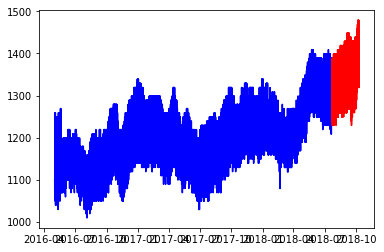

In [41]:
plt.plot(training,'b')
plt.plot(testing,'r')


In [42]:
training=training['diesel']
training.tail()

date
2018-07-22 19:42:00    1239
2018-07-22 20:00:00    1239
2018-07-22 20:09:00    1239
2018-07-22 20:47:00    1239
2018-07-22 21:00:00    1239
Name: diesel, dtype: int32

In [43]:

#Checking the stationery of time series


from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)
    
#Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
  

C:\Users\Bibek\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  if __name__ == '__main__':
C:\Users\Bibek\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  # Remove the CWD from sys.path while we load stuff.


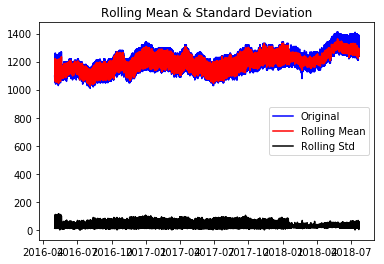

Results of Dickey-Fuller Test:
Test Statistic                    -3.112555
p-value                            0.025638
#Lags Used                        48.000000
Number of Observations Used    30166.000000
Critical Value (1%)               -3.430567
Critical Value (5%)               -2.861636
Critical Value (10%)              -2.566821
dtype: float64


In [44]:
  test_stationarity(training)

In [45]:
#from numpy import log
#X=log(tf)
#split = int(len(X) / 2)
#X1=X[0:split]
#X2 =X[split:]
#mean1, mean2 = X1.mean(), X2.mean()
#var1, var2 = X1.var(), X2.var()
#print('mean1=%f, mean2=%f' % (mean1, mean2))
#print('variance1=%f, variance2=%f' % (var1, var2))

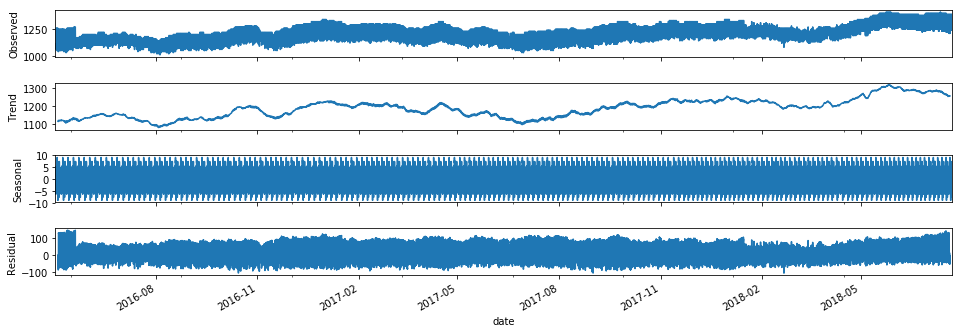

In [46]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition=seasonal_decompose(training,model="additive",filt=None, freq=168)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
fig = decomposition.plot()
fig.set_size_inches(15, 5)

In [47]:
#training=np.log(training)

In [48]:
#test_stationarity(training)

C:\Users\Bibek\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  if __name__ == '__main__':
C:\Users\Bibek\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  # Remove the CWD from sys.path while we load stuff.


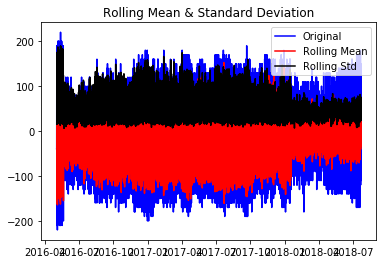

Results of Dickey-Fuller Test:
Test Statistic                   -36.143553
p-value                            0.000000
#Lags Used                        50.000000
Number of Observations Used    30140.000000
Critical Value (1%)               -3.430567
Critical Value (5%)               -2.861636
Critical Value (10%)              -2.566821
dtype: float64


In [49]:
training_Seasonal_difference=training - training.shift(24)
test_stationarity(training_Seasonal_difference.dropna(inplace=False))

C:\Users\Bibek\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  if __name__ == '__main__':
C:\Users\Bibek\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  # Remove the CWD from sys.path while we load stuff.


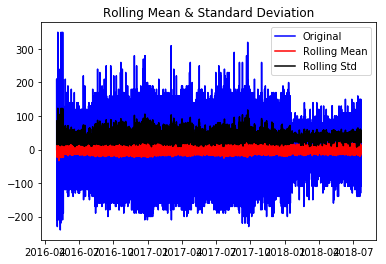

Results of Dickey-Fuller Test:
Test Statistic                   -48.401541
p-value                            0.000000
#Lags Used                        51.000000
Number of Observations Used    30138.000000
Critical Value (1%)               -3.430567
Critical Value (5%)               -2.861636
Critical Value (10%)              -2.566821
dtype: float64


In [50]:
#tf_log_diff=tf_log_diff.iloc[1:]
#tf_log_diff=tf_log(periods=1).values[1:]
#tf_log_diff=tf_log - tf_log.shift(24)
#tf_log_diff.head(100)
training_Seasonal_First_difference=training_Seasonal_difference-training_Seasonal_difference.shift(1)

test_stationarity(training_Seasonal_First_difference.dropna(inplace=False))

In [51]:
training_Seasonal_First_difference.dropna(inplace=True)
residual.dropna(inplace=True)

Text(0.5,0,'date')

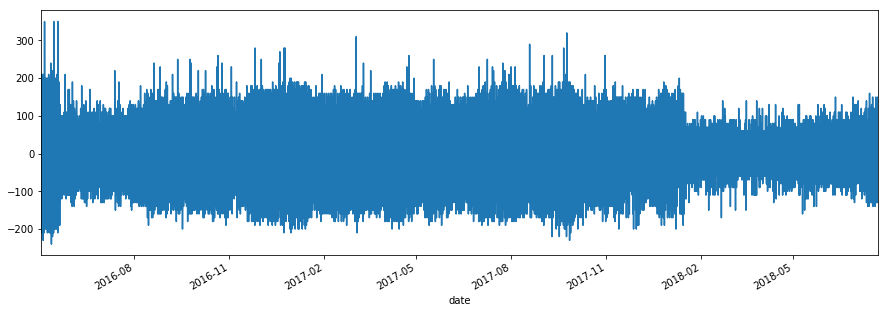

In [52]:
#tf_log_diff=tf_log_diff.iloc[1:]
training_Seasonal_difference.dropna(inplace=True)
my_plot=training_Seasonal_First_difference.plot(kind='line',figsize=(15,5))
my_plot.set_xlabel("date")
#plt.plot(tf_log_diff)

In [53]:
#test_stationarity(tf_log_diff)

In [54]:

#tf_decompose=residual
#tf_decompose.dropna(inplace=True)
#test_stationarity(tf_decompose)

In [55]:
#tf.head()

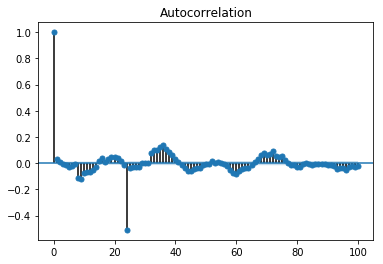

In [56]:
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(training_Seasonal_First_difference,lags=100)
#plot_acf(residual,lags=50)
pyplot.show()

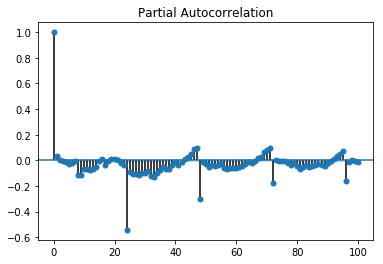

In [57]:
plot_pacf(training_Seasonal_First_difference,lags=100)
pyplot.show()

In [58]:
#tf.head()
#tf_log_diff.head()

In [59]:

#model = ARIMA(tf_log,order=(1,1,1))  
#results_ARIMA = model.fit(disp=-1)  
#plt.plot(tf_log_diff)
#plt.plot(results_ARIMA.fittedvalues, color='red')
#plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-tf_log_diff)**2))


ARIMA sumarry and residual plots

In [60]:
# Define the p, d and q parameters to take any value between 0 and 2
p =range(0,2)
d =range(0,2)
q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 24) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 24)
SARIMAX: (0, 0, 1) x (0, 1, 0, 24)
SARIMAX: (0, 1, 0) x (0, 1, 1, 24)
SARIMAX: (0, 1, 0) x (1, 0, 0, 24)


c4=[]
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(training,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}24 - AIC:{}'.format(param, param_seasonal, results.aic))
            c4.append('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            c4.append(results.aic)
        except:
            continue

In [61]:
model =sm.tsa.statespace.SARIMAX(training.values,order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 24),
                                enforce_stationarity=False,
                                enforce_invertibilit=False)

model_fit = model.fit()

print(model_fit.summary())


                                 Statespace Model Results                                 
Dep. Variable:                                  y   No. Observations:                30215
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 24)   Log Likelihood             -144177.588
Date:                            Sun, 06 Jan 2019   AIC                         288365.177
Time:                                    17:26:59   BIC                         288406.749
Sample:                                         0   HQIC                        288378.512
                                          - 30215                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8310      0.005    177.184      0.000       0.822       0.840
ma.L1         -0.9954      0.001  -

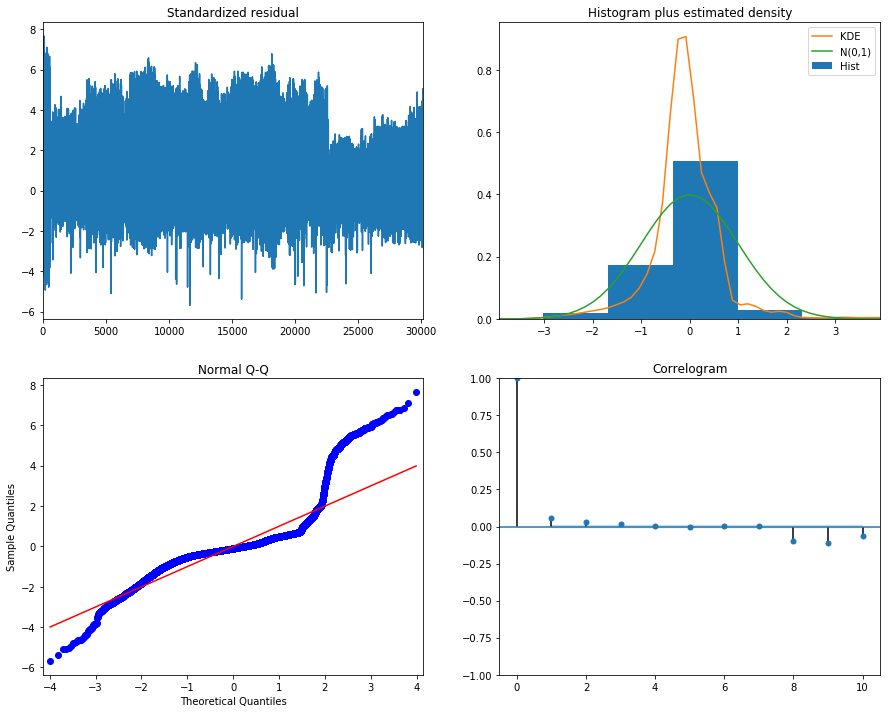

In [62]:
model_fit.plot_diagnostics(figsize=(15,12))
plt.show()

In [63]:
print(model_fit)

In [64]:
testing.head()

,diesel
date,
2018-07-22 22:00:00,1289
2018-07-22 23:00:00,1289
2018-07-23 00:00:00,1289
2018-07-23 01:00:00,1289
2018-07-23 02:00:00,1289


In [65]:
#testing['forecast']=model_fit.predict(start =28341, end = 29832, dynamic=False)

#plt.plot(df,'b')
#plt.plot(testing['forecast'],'r');
#testing[['diesel', 'forecast']].plot(figsize=(12, 8))


In [66]:
testing.head(100)

,diesel
date,
2018-07-22 22:00:00,1289
2018-07-22 23:00:00,1289
2018-07-23 00:00:00,1289
2018-07-23 01:00:00,1289
2018-07-23 02:00:00,1289
2018-07-23 03:00:00,1289
2018-07-23 04:00:00,1289
2018-07-23 05:00:00,1289
2018-07-23 06:00:00,1389


C:\Users\Bibek\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


date
2018-07-22 22:00:00    1243.022451
2018-07-22 23:00:00    1246.222087
2018-07-23 00:00:00    1246.579010
2018-07-23 01:00:00    1248.364236
2018-07-23 02:00:00    1251.837398
2018-07-23 03:00:00    1252.635126
2018-07-23 04:00:00    1256.246761
2018-07-23 05:00:00    1258.523287
2018-07-23 06:00:00    1260.971175
2018-07-23 07:00:00    1261.767079
2018-07-23 07:47:00    1261.507381
2018-07-23 08:00:00    1260.968637
2018-07-23 08:35:00    1259.935853
2018-07-23 08:45:00    1261.426012
2018-07-23 09:00:00    1262.850149
2018-07-23 09:12:00    1262.333670
2018-07-23 09:46:00    1263.320247
2018-07-23 10:00:00    1263.515176
2018-07-23 10:09:00    1263.648915
2018-07-23 10:35:00    1265.469714
2018-07-23 11:00:00    1265.529072
2018-07-23 11:50:00    1266.399129
2018-07-23 12:00:00    1266.520114
2018-07-23 12:30:00    1266.043787
2018-07-23 13:00:00    1265.267501
2018-07-23 13:48:00    1264.488169
2018-07-23 13:58:00    1265.407109
2018-07-23 14:00:00    1264.470826
2018-07-23 14:4

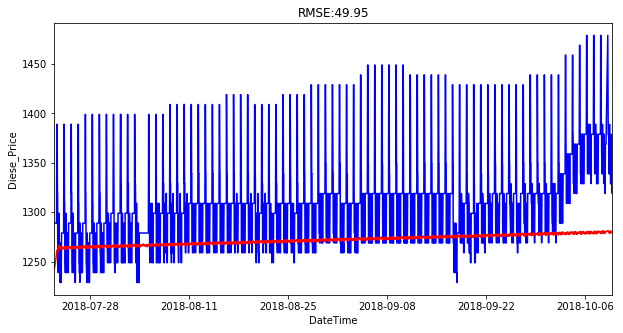

In [67]:
K=len(testing)
testing['forecast']=model_fit.forecast(K)
#forecast=forecast.astype(int)
#forecast=np.exp(forecast)
print(testing['forecast'])
#plot forecast results and display RMSE
plt.figure(figsize=(10,5))
plt.plot(testing['diesel'],'b');
plt.plot(testing['forecast'],'r');

plt.title('RMSE:%.2f'% np.sqrt(sum((testing['diesel']-testing['forecast'])**2)/len(testing)));
plt.xlabel("DateTime");
plt.ylabel("Diese_Price");
plt.autoscale(enable=True,axis='x',tight=True)
#plt.axvline(x=tf.index[split_point],color='black');#line separates training/testing

Scaling back Predictions

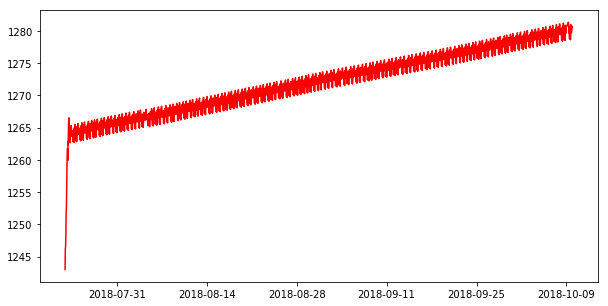

In [68]:
plt.figure(figsize=(10,5))
plt.plot(testing['forecast'],'r');

In [69]:
testing.head()

,diesel,forecast
date,,
2018-07-22 22:00:00,1289,1243.022451
2018-07-22 23:00:00,1289,1246.222087
2018-07-23 00:00:00,1289,1246.579010
2018-07-23 01:00:00,1289,1248.364236
2018-07-23 02:00:00,1289,1251.837398


In [70]:
#Monthly_data=df['2017-9-2':'2017-9-9']
test=testing['2018-8-2':'2018-8-9']
test.head()

,diesel,forecast
date,,
2018-08-02 00:00:00,1299,1266.862650
2018-08-02 01:00:00,1299,1266.315916
2018-08-02 02:00:00,1299,1265.726829
2018-08-02 03:00:00,1299,1266.577689
2018-08-02 04:00:00,1299,1265.771248


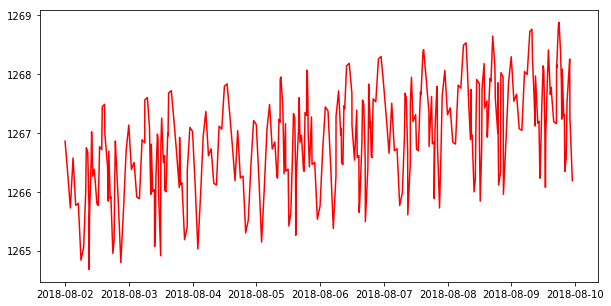

In [71]:
plt.figure(figsize=(10,5))
plt.plot(test['forecast'],'r');